In [1]:
import konlpy
import pandas as pd
import numpy as np 
import re

In [3]:
df = pd.read_excel("crawl/naver_cafe_ssal_contents_2019_Ï†ÑÏ≤òÎ¶¨ÏôÑ.xlsx")
df.head(2)

title   nickname        date  \
0   Îã§Ïö¥ÌÉÄÏö¥ **Î¶Ñ Ïç©ÏùÄÍ≥∞Ìå°Ïù¥ ÏåÄ ..  taniamama  2019.01.30   
1  ÏåÄÎßàÎì§Î†å 3Ï¢Ö(Î™®Ïπ¥, ÌóàÎãàÏú†Ïûê, Ïë•)        Ï™ºÎ°úÎ∞ã  2019.01.08   

                                             content  \
0  ÏïàÎÖïÌïòÏÑ∏Ïöî,,18Í∞úÏõî ÏïÑÍ∏∞ Í∏∞Î•¥Îäî ÏóÑÎßàÏûÖÎãàÎã§..Ïù¥Îü¥Îïê Ïñ¥ÎñªÍ≤å ÎåÄÏ≤ò Ìï¥ÏïºÌï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥...   
1  ÏóÑÏ≤≠ Ïò§ÎûúÎßåÏóê Î≤†Ïù¥ÌÇπ ÌïòÎäîÍ±∞ Í∞ôÎÑ§Ïö©..„Ö†„Ö†Î≤ÑÌÑ∞ÎèÑ Í±∞ÏùòÎ∞îÎã•Ïù¥ÏóàÍ≥†..Í∞ÄÎ£®Î•òÎèÑ ÏóÜÎäîÎç∞Îã§Í∞Ä...   

                                            comments  
0  ÏöîÏ¶ò Ïó¨Í∏∞ ÏåÄ Ìï†Ïù∏ÌïòÎçòÎç∞ Í∞ôÏùÄÏåÄÏùºÍπåÏöî||Ï†Ñ 2018ÎÖÑ 10ÏõîÏóê Ìíç * ÌñÖÏåÄ Ïù¥ÎùºÍ≥† ...  
1  Ïë• ÎßàÎì§Î†å!! ÏôÑÏ†Ñ ÎßõÎÇòÍ≤†Îã§Ïö©~~~Ïë•Ìñ• ÏÜîÏÜî~~üòç||ÏΩ©Í∞ÄÎ£® Î¨ªÌûêÍπåÌïòÎã§Í∞Ä ÍπîÎÅîÌïúÍ≤å ÎÇò...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     9554 non-null   object
 1   nickname  9554 non-null   object
 2   date      9554 non-null   object
 3   content   9549 non-null   object
 4   comments  9036 non-null   object
dtypes: object(5)
memory usage: 373.3+ KB


In [5]:
#  NullÍ∞í Ï†úÍ±∞
df = df.dropna(axis=0, how='any', subset=['content'])
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9549 non-null   int64 
 1   title     9549 non-null   object
 2   nickname  9549 non-null   object
 3   date      9549 non-null   object
 4   content   9549 non-null   object
 5   comments  9032 non-null   object
dtypes: int64(1), object(5)
memory usage: 447.7+ KB


In [22]:
def text_cleaning(text):
    hangul = re.compile('[^ „Ñ±-„Ö£Í∞Ä-Ìû£0-9]+') 
    result = hangul.sub(' ', str(text))
    return result

df['ko_text'] = df['content'].apply(lambda x : text_cleaning(x))
df.head()

index                 title   nickname        date  \
0      0   Îã§Ïö¥ÌÉÄÏö¥ **Î¶Ñ Ïç©ÏùÄÍ≥∞Ìå°Ïù¥ ÏåÄ ..  taniamama  2019.01.30   
1      1  ÏåÄÎßàÎì§Î†å 3Ï¢Ö(Î™®Ïπ¥, ÌóàÎãàÏú†Ïûê, Ïë•)        Ï™ºÎ°úÎ∞ã  2019.01.08   
2      2      ÏåÄÏóê ÎÑ£Ïñ¥ÎÜìÏùÄ ÏàØÏóê Î≤åÎ†àÍ∞Ä „Ö†         Ïó∞Ïäà  2019.01.17   
3      3  67,000 ÏõêÏßúÎ¶¨ ÏåÄ Í∞úÎ¥âÌñàÏäµÎãàÎã§!       Î∞ïÏßÄÎßàÎØ∏  2019.01.14   
4      4      Ï≤®ÏúºÎ°ú Î≤†Ìä∏ÎÇ®ÏåÄÎ°ú Î∞•ÏßÄÏóàÏñ¥Ïöî.       Ï°∞ÏùÄÏÇ¨Îûå  2019.01.26   

                                             content  \
0  ÏïàÎÖïÌïòÏÑ∏Ïöî,,18Í∞úÏõî ÏïÑÍ∏∞ Í∏∞Î•¥Îäî ÏóÑÎßàÏûÖÎãàÎã§..Ïù¥Îü¥Îïê Ïñ¥ÎñªÍ≤å ÎåÄÏ≤ò Ìï¥ÏïºÌï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥...   
1  ÏóÑÏ≤≠ Ïò§ÎûúÎßåÏóê Î≤†Ïù¥ÌÇπ ÌïòÎäîÍ±∞ Í∞ôÎÑ§Ïö©..„Ö†„Ö†Î≤ÑÌÑ∞ÎèÑ Í±∞ÏùòÎ∞îÎã•Ïù¥ÏóàÍ≥†..Í∞ÄÎ£®Î•òÎèÑ ÏóÜÎäîÎç∞Îã§Í∞Ä...   
2  Î≤åÎ†àÏñòÍ∏∞ Ï£ÑÏÜ°Ìï¥Ïöî „Ö†ÏåÄÏùÑ ÏÉÅÏò® Î≥¥Í¥Ä Ï§ëÏù∏Îç∞(ÎÉâÏû•Í≥†Ïóê ÎèÑÏ†ÄÌûà ÏûêÎ¶¨Í∞Ä ÏïàÎÇòÏÑú)ÌòπÏãúÎÇò ÏåÄ...   
3  Ïò§Îäò Ï†ÄÌù¨ Ïßë ÏåÄÏù¥ ÏóÜÏñ¥ÏÑú 2ÏãùÏùÄ Î∂ÑÏãùÏúºÎ°ú ÎñºÏõ†ÎäîÎç∞ÎÇ®Ìé∏Ïù¥Í∞Ä ÏåÄÏùÑ ÏÇ¨Ïò§Í∏¥ ÏÇ¨ÏôîÎäîÎç∞Îß§ÎåÄ...   
4  Ï≤òÏùåÏôÄÏÑúÎäî ÏùºÎ≥∏ÌíàÏ¢ÖÏåÄ Ï£ºÎ¨∏Ìï¥Î®πÏóàÏóàÍ≥†.Í∑∏Îã¥Ïóî ÌïúÍµ≠ÏåÄÎ®πÏóàÎäîÎç∞~ÎßàÌä∏ÏóêÏÑú ÌïúÍµ≠ÏïÑÏ£ºÎ®∏ÎãàÍªòÏÑú ...   

                                            comments  \
0  ÏöîÏ¶ò Ïó¨Í∏∞ ÏåÄ Ìï†Ïù∏ÌïòÎçòÎç∞ Í∞ôÏùÄÏåÄÏùºÍπåÏöî||Ï†Ñ 2018ÎÖÑ 10ÏõîÏóê Ìíç * ÌñÖÏåÄ Ïù¥ÎùºÍ≥† ...   
1  Ïë• ÎßàÎì§Î†å!! ÏôÑÏ†Ñ ÎßõÎÇòÍ≤†Îã§Ïö©~~~Ïë•Ìñ• ÏÜîÏÜî~~üòç||ÏΩ©Í∞ÄÎ£® Î¨ªÌûêÍπåÌïòÎã§Í∞Ä ÍπîÎÅîÌïúÍ≤å ÎÇò...   
2  ÏàØ, ÎßàÎäò ÎÑ£Ïñ¥ÎëêÎ©¥ Î≤åÎ†à Ïïà ÏÉùÍ∏∞Îã§Îäî Îßê Îì§ÏóàÎäîÎç∞\nÏÉùÍ∏∞ÎäîÍµ∞Ïöî „Ö†„Ö†\nÏ†Ñ Í≤®Ïö∏Ïóî ÎùΩ...   
3  ÏïÖ..ÎπÑÏã∏ÎÑ§Ïöî„Ö†\nÍ∑∏ÎßåÌÅº Îçî Ï∞∞ÏßÄÍ≥† ÎßõÏûàÏùÑÍ∫ºÏòàÏöî~ „Öé„Öé\n\nÍ∑ºÎç∞ Ï†ÄÎèÑ Ïã§ÌïúÏò¨Ïû°ÏïÑÏÑú...   
4  Ï†ÄÎèÑ Î≤†Ìä∏ÎÇ®ÏåÄ  ÏÇ¨Î®πÏñ¥Ïöî~~ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßõÏûàÎçîÎùºÍµ¨Ïöî~~||Í∑∏ÎãàÍπåÏöî. ÎßõÎèÑÏóÜÍ≥† ÎÉÑÏÉàÎèÑÎÇ†Ï§Ñ...   

                                             ko_text  
0  ÏïàÎÖïÌïòÏÑ∏Ïöî 18Í∞úÏõî ÏïÑÍ∏∞ Í∏∞Î•¥Îäî ÏóÑÎßàÏûÖÎãàÎã§ Ïù¥Îü¥Îïê Ïñ¥ÎñªÍ≤å ÎåÄÏ≤ò Ìï¥ÏïºÌï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥ÏÑú ...  
1  ÏóÑÏ≤≠ Ïò§ÎûúÎßåÏóê Î≤†Ïù¥ÌÇπ ÌïòÎäîÍ±∞ Í∞ôÎÑ§Ïö© „Ö†„Ö†Î≤ÑÌÑ∞ÎèÑ Í±∞ÏùòÎ∞îÎã•Ïù¥ÏóàÍ≥† Í∞ÄÎ£®Î•òÎèÑ ÏóÜÎäîÎç∞Îã§Í∞ÄÏ†ÄÎ≤à...  
2  Î≤åÎ†àÏñòÍ∏∞ Ï£ÑÏÜ°Ìï¥Ïöî „Ö†ÏåÄÏùÑ ÏÉÅÏò® Î≥¥Í¥Ä Ï§ëÏù∏Îç∞ ÎÉâÏû•Í≥†Ïóê ÎèÑÏ†ÄÌûà ÏûêÎ¶¨Í∞Ä ÏïàÎÇòÏÑú ÌòπÏãúÎÇò ÏåÄ...  
3  Ïò§Îäò Ï†ÄÌù¨ Ïßë ÏåÄÏù¥ ÏóÜÏñ¥ÏÑú 2ÏãùÏùÄ Î∂ÑÏãùÏúºÎ°ú ÎñºÏõ†ÎäîÎç∞ÎÇ®Ìé∏Ïù¥Í∞Ä ÏåÄÏùÑ ÏÇ¨Ïò§Í∏¥ ÏÇ¨ÏôîÎäîÎç∞Îß§ÎåÄ...  
4  Ï≤òÏùåÏôÄÏÑúÎäî ÏùºÎ≥∏ÌíàÏ¢ÖÏåÄ Ï£ºÎ¨∏Ìï¥Î®πÏóàÏóàÍ≥† Í∑∏Îã¥Ïóî ÌïúÍµ≠ÏåÄÎ®πÏóàÎäîÎç∞ ÎßàÌä∏ÏóêÏÑú ÌïúÍµ≠ÏïÑÏ£ºÎ®∏ÎãàÍªòÏÑú ...

In [23]:
for i in range(len(df['ko_text'])):
    if len(df['ko_text'][i]) == 0:
        df = df.drop(index=i)

In [24]:
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   level_0   9549 non-null   int64 
 1   index     9549 non-null   int64 
 2   title     9549 non-null   object
 3   nickname  9549 non-null   object
 4   date      9549 non-null   object
 5   content   9549 non-null   object
 6   comments  9032 non-null   object
 7   ko_text   9549 non-null   object
dtypes: int64(2), object(6)
memory usage: 596.9+ KB


In [ ]:
del df['level_0']

In [26]:
df1 = df.iloc[:50]

In [12]:
#from konlpy.tag import Hannanum
#from collections import Counter

In [27]:
from kss import split_sentences

In [32]:
df.head()

index                 title   nickname        date  \
0      0   Îã§Ïö¥ÌÉÄÏö¥ **Î¶Ñ Ïç©ÏùÄÍ≥∞Ìå°Ïù¥ ÏåÄ ..  taniamama  2019.01.30   
1      1  ÏåÄÎßàÎì§Î†å 3Ï¢Ö(Î™®Ïπ¥, ÌóàÎãàÏú†Ïûê, Ïë•)        Ï™ºÎ°úÎ∞ã  2019.01.08   
2      2      ÏåÄÏóê ÎÑ£Ïñ¥ÎÜìÏùÄ ÏàØÏóê Î≤åÎ†àÍ∞Ä „Ö†         Ïó∞Ïäà  2019.01.17   
3      3  67,000 ÏõêÏßúÎ¶¨ ÏåÄ Í∞úÎ¥âÌñàÏäµÎãàÎã§!       Î∞ïÏßÄÎßàÎØ∏  2019.01.14   
4      4      Ï≤®ÏúºÎ°ú Î≤†Ìä∏ÎÇ®ÏåÄÎ°ú Î∞•ÏßÄÏóàÏñ¥Ïöî.       Ï°∞ÏùÄÏÇ¨Îûå  2019.01.26   

                                             content  \
0  ÏïàÎÖïÌïòÏÑ∏Ïöî,,18Í∞úÏõî ÏïÑÍ∏∞ Í∏∞Î•¥Îäî ÏóÑÎßàÏûÖÎãàÎã§..Ïù¥Îü¥Îïê Ïñ¥ÎñªÍ≤å ÎåÄÏ≤ò Ìï¥ÏïºÌï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥...   
1  ÏóÑÏ≤≠ Ïò§ÎûúÎßåÏóê Î≤†Ïù¥ÌÇπ ÌïòÎäîÍ±∞ Í∞ôÎÑ§Ïö©..„Ö†„Ö†Î≤ÑÌÑ∞ÎèÑ Í±∞ÏùòÎ∞îÎã•Ïù¥ÏóàÍ≥†..Í∞ÄÎ£®Î•òÎèÑ ÏóÜÎäîÎç∞Îã§Í∞Ä...   
2  Î≤åÎ†àÏñòÍ∏∞ Ï£ÑÏÜ°Ìï¥Ïöî „Ö†ÏåÄÏùÑ ÏÉÅÏò® Î≥¥Í¥Ä Ï§ëÏù∏Îç∞(ÎÉâÏû•Í≥†Ïóê ÎèÑÏ†ÄÌûà ÏûêÎ¶¨Í∞Ä ÏïàÎÇòÏÑú)ÌòπÏãúÎÇò ÏåÄ...   
3  Ïò§Îäò Ï†ÄÌù¨ Ïßë ÏåÄÏù¥ ÏóÜÏñ¥ÏÑú 2ÏãùÏùÄ Î∂ÑÏãùÏúºÎ°ú ÎñºÏõ†ÎäîÎç∞ÎÇ®Ìé∏Ïù¥Í∞Ä ÏåÄÏùÑ ÏÇ¨Ïò§Í∏¥ ÏÇ¨ÏôîÎäîÎç∞Îß§ÎåÄ...   
4  Ï≤òÏùåÏôÄÏÑúÎäî ÏùºÎ≥∏ÌíàÏ¢ÖÏåÄ Ï£ºÎ¨∏Ìï¥Î®πÏóàÏóàÍ≥†.Í∑∏Îã¥Ïóî ÌïúÍµ≠ÏåÄÎ®πÏóàÎäîÎç∞~ÎßàÌä∏ÏóêÏÑú ÌïúÍµ≠ÏïÑÏ£ºÎ®∏ÎãàÍªòÏÑú ...   

                                            comments  \
0  ÏöîÏ¶ò Ïó¨Í∏∞ ÏåÄ Ìï†Ïù∏ÌïòÎçòÎç∞ Í∞ôÏùÄÏåÄÏùºÍπåÏöî||Ï†Ñ 2018ÎÖÑ 10ÏõîÏóê Ìíç * ÌñÖÏåÄ Ïù¥ÎùºÍ≥† ...   
1  Ïë• ÎßàÎì§Î†å!! ÏôÑÏ†Ñ ÎßõÎÇòÍ≤†Îã§Ïö©~~~Ïë•Ìñ• ÏÜîÏÜî~~üòç||ÏΩ©Í∞ÄÎ£® Î¨ªÌûêÍπåÌïòÎã§Í∞Ä ÍπîÎÅîÌïúÍ≤å ÎÇò...   
2  ÏàØ, ÎßàÎäò ÎÑ£Ïñ¥ÎëêÎ©¥ Î≤åÎ†à Ïïà ÏÉùÍ∏∞Îã§Îäî Îßê Îì§ÏóàÎäîÎç∞\nÏÉùÍ∏∞ÎäîÍµ∞Ïöî „Ö†„Ö†\nÏ†Ñ Í≤®Ïö∏Ïóî ÎùΩ...   
3  ÏïÖ..ÎπÑÏã∏ÎÑ§Ïöî„Ö†\nÍ∑∏ÎßåÌÅº Îçî Ï∞∞ÏßÄÍ≥† ÎßõÏûàÏùÑÍ∫ºÏòàÏöî~ „Öé„Öé\n\nÍ∑ºÎç∞ Ï†ÄÎèÑ Ïã§ÌïúÏò¨Ïû°ÏïÑÏÑú...   
4  Ï†ÄÎèÑ Î≤†Ìä∏ÎÇ®ÏåÄ  ÏÇ¨Î®πÏñ¥Ïöî~~ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßõÏûàÎçîÎùºÍµ¨Ïöî~~||Í∑∏ÎãàÍπåÏöî. ÎßõÎèÑÏóÜÍ≥† ÎÉÑÏÉàÎèÑÎÇ†Ï§Ñ...   

                                             ko_text  
0  ÏïàÎÖïÌïòÏÑ∏Ïöî 18Í∞úÏõî ÏïÑÍ∏∞ Í∏∞Î•¥Îäî ÏóÑÎßàÏûÖÎãàÎã§ Ïù¥Îü¥Îïê Ïñ¥ÎñªÍ≤å ÎåÄÏ≤ò Ìï¥ÏïºÌï†ÏßÄ Î™®Î•¥Í≤†Ïñ¥ÏÑú ...  
1  ÏóÑÏ≤≠ Ïò§ÎûúÎßåÏóê Î≤†Ïù¥ÌÇπ ÌïòÎäîÍ±∞ Í∞ôÎÑ§Ïö© „Ö†„Ö†Î≤ÑÌÑ∞ÎèÑ Í±∞ÏùòÎ∞îÎã•Ïù¥ÏóàÍ≥† Í∞ÄÎ£®Î•òÎèÑ ÏóÜÎäîÎç∞Îã§Í∞ÄÏ†ÄÎ≤à...  
2  Î≤åÎ†àÏñòÍ∏∞ Ï£ÑÏÜ°Ìï¥Ïöî „Ö†ÏåÄÏùÑ ÏÉÅÏò® Î≥¥Í¥Ä Ï§ëÏù∏Îç∞ ÎÉâÏû•Í≥†Ïóê ÎèÑÏ†ÄÌûà ÏûêÎ¶¨Í∞Ä ÏïàÎÇòÏÑú ÌòπÏãúÎÇò ÏåÄ...  
3  Ïò§Îäò Ï†ÄÌù¨ Ïßë ÏåÄÏù¥ ÏóÜÏñ¥ÏÑú 2ÏãùÏùÄ Î∂ÑÏãùÏúºÎ°ú ÎñºÏõ†ÎäîÎç∞ÎÇ®Ìé∏Ïù¥Í∞Ä ÏåÄÏùÑ ÏÇ¨Ïò§Í∏¥ ÏÇ¨ÏôîÎäîÎç∞Îß§ÎåÄ...  
4  Ï≤òÏùåÏôÄÏÑúÎäî ÏùºÎ≥∏ÌíàÏ¢ÖÏåÄ Ï£ºÎ¨∏Ìï¥Î®πÏóàÏóàÍ≥† Í∑∏Îã¥Ïóî ÌïúÍµ≠ÏåÄÎ®πÏóàÎäîÎç∞ ÎßàÌä∏ÏóêÏÑú ÌïúÍµ≠ÏïÑÏ£ºÎ®∏ÎãàÍªòÏÑú ...

In [33]:
def get_sentences(x):
    sentence = split_sentences(x)
    return sentence

# 'ko_text' ÌîºÏ≤òÏóê Ï†ÅÏö©
df['sentences'] = df['ko_text'].apply(lambda x: get_sentences(x))
df.head()

In [31]:
"""def get_sentences(x):
    sentence = split_sentences(x)
    return sentence

# 'ko_text' ÌîºÏ≤òÏóê Ï†ÅÏö©
df['sentences'] = df['content'].apply(lambda x: get_sentences(x))
df.head()"""

KeyboardInterrupt: 

In [29]:
# ÏóëÏÖÄ ÌååÏùºÎ°ú Ï†ÄÏû•
writer = pd.ExcelWriter('kss_test.xlsx')
df1.to_excel(writer,index =False)
writer.save()

In [13]:
stopwords = ['ÏåÄ', 'ÌåêÎß§']

def get_nouns(x):
    nouns_tagger = Hannanum()
    nouns = nouns_tagger.nouns(x)
    # ÌïúÍ∏ÄÏûê ÌÇ§ÏõåÎìúÎ•º Ï†úÍ±∞
    nouns = [noun for noun in nouns if len(noun) > 1]
    #Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

# 'ko_text' ÌîºÏ≤òÏóê Ï†ÅÏö©
df1['nouns'] = df1['ko_text'].apply(lambda x: get_nouns(x))
print(df1.shape)
df1.head()

KeyboardInterrupt: 

In [55]:
# Ìä∏ÎûúÏû≠ÏÖò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # Í≥µÎ∞± Î¨∏ÏûêÏó¥ Î∞©ÏßÄ

In [56]:
ex_list=[]
for i in transactions:
    for j in i:
        ex_list.append(j)

In [57]:
from collections import Counter

count = Counter(ex_list)
count

Counter({'Ïã¨Ìîå': 2,
         'Î¶¨': 3,
         'Î†àÏãúÌîº': 25,
         'ÎßêÏÑ∏': 1,
         'Ïùº': 25,
         'Ïó∞Îßê': 1,
         'Ïù¥Î≤§Ìä∏': 521,
         'ÎàÑÎ£ΩÏßÄ': 55,
         'Ï∞®': 13,
         'Ï†úÌíà': 28,
         'Îñ°Î≥∂Ïù¥': 1,
         'ÌõÑÎùºÏù¥Ìå¨': 1,
         'Ï∞∏Í∏∞Î¶Ñ': 15,
         'Î¨∏Ïùò': 4,
         'ÏûÖÎçß': 1,
         'ÎÜà': 1,
         'Ï£ºÎ∞©': 24,
         'Ï£ºÎßê': 13,
         'Ïù∏ÌÖåÎ¶¨Ïñ¥': 11,
         'Ïßë': 41,
         'ÌôàÏä§': 2,
         'Ï°∞Î™Ö': 3,
         'ÎßàÎ•¥': 1,
         'ÏÖãÏßÑÏ†Ä': 1,
         'ÏßÅÍµ¨': 2,
         'ÏïÑÏπ®': 32,
         'ÌïòÎäò': 1,
         'Ïù¥ÏÇ≠': 2,
         'ÏÑ†Î¨º': 79,
         'ÏÑ∏Ìä∏': 50,
         'Î∞•': 330,
         'Ïã†Ìòº': 10,
         'ÏßëÎì§Ïù¥': 7,
         'Ï∂îÏ≤ú': 98,
         'ÌòºÌï©': 111,
         'Ï¢ÖÎ•ò': 4,
         'ÏåÄ': 616,
         'Íµ≠ÏÇ∞': 28,
         'Îèå': 12,
         'ÎãµÎ°Ä': 59,
         'Ìíà': 55,
         'Ìè¨Ïû•': 76,
         'Íµ≠ÎÇ¥': 41,
         'ÏÇ∞': 56,

In [68]:
words = dict(count.most_common())
words

{'ÏåÄ': 616,
 'Ïù¥Î≤§Ìä∏': 521,
 'Î∞•': 330,
 'Í±¥Í∞ï': 197,
 'ÌòÑÎØ∏': 133,
 'ÌòºÌï©': 111,
 'ÎßõÏßë': 101,
 'Îã§Ïù¥Ïñ¥Ìä∏': 99,
 'Ï∂îÏ≤ú': 98,
 'ÏãùÎã®': 92,
 'ÏùºÏÉÅ': 83,
 'ÏßëÎ∞•': 83,
 'Í∑ÄÎ¶¨': 80,
 'ÏÑ†Î¨º': 79,
 'Ìè¨Ïû•': 76,
 'Ïö©Í∏∞': 73,
 'ÏΩ©': 70,
 'ÏöîÎ¶¨': 70,
 'Ïã†ÎèôÏßÑ': 69,
 'Î≥¥Î¶¨': 66,
 'Ìë∏Îìú': 64,
 'Ïù∏Ïä§ÌÉÄ': 63,
 'Ï∞πÏåÄ': 63,
 'ÏóÑÎßà': 62,
 'ÎåìÍ∏Ä': 60,
 'ÎãµÎ°Ä': 59,
 'Î∞•ÏÉÅ': 58,
 'ÏÇ∞': 56,
 'Í≤ΩÌíà': 56,
 'Ï¶ùÏ†ï': 56,
 'ÎàÑÎ£ΩÏßÄ': 55,
 'Ìíà': 55,
 'Íµ¨ÎèÖ': 55,
 'ÏÑ∏Ìä∏': 50,
 'Í≥°Î¨º': 47,
 'Í∞ÑÏãù': 46,
 'ÎØ∏Í∞Å': 44,
 'Ï∞∞': 43,
 'Ïßë': 41,
 'Íµ≠ÎÇ¥': 41,
 'Íµ¥ÎπÑ': 41,
 'ÎßõÏä§ÌÉÄ': 39,
 'Ï∞∞Î≥¥Î¶¨': 38,
 'ÎÜçÏÇ∞Î¨º': 38,
 'Í≥§ÏïΩ': 37,
 'Îπµ': 37,
 'ÏãùÌíà': 36,
 'Î¨¥': 35,
 'Ïú°ÏïÑ': 34,
 'ÎÅº': 34,
 'ÏÑúÎ¶¨': 34,
 'ÏïÑÏπ®': 32,
 'ÎÜçÎ∂Ä': 32,
 'ÏòÅÏñë': 32,
 'ÌòëÏ∞¨': 32,
 'Ìåî': 31,
 'Î¶¨Îã§': 31,
 'Îã§Ïù¥Ïñ¥Ìä∏ÏãùÎã®': 30,
 'Î©îÎâ¥': 30,
 'ÌÉú': 30,
 'ÏùåÏãù': 29,
 'Ï†úÌíà': 28,
 'Íµ≠ÏÇ∞': 28,
 'Îñ°': 28,
 'Í≥†Ï∞Ω': 28,
 'ÎÜçÏïΩ': 27,
 'Ï

### ÏãúÍ∞ÅÌôî

In [59]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# ÌïúÍ∏ÄÌè∞Ìä∏ ÏÇ¨Ïö©
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [60]:
import nltk

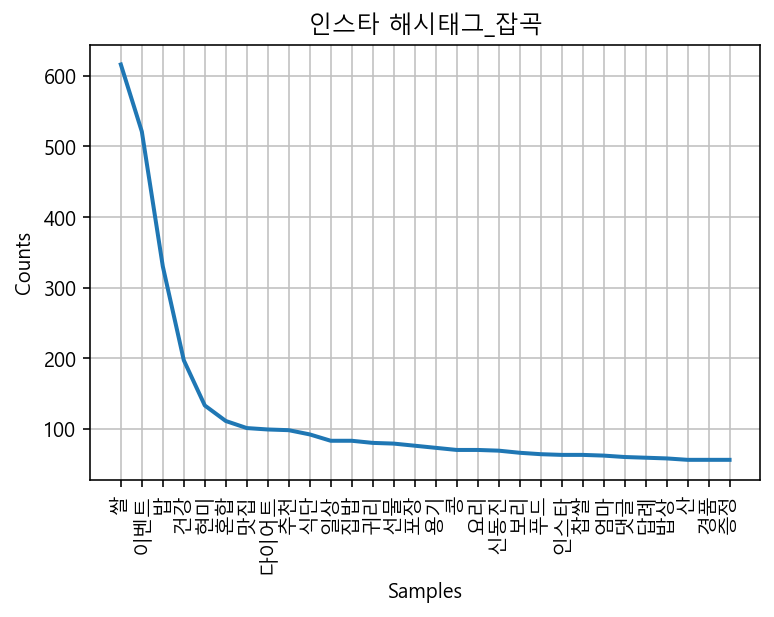

In [69]:
bab = nltk.Text(ex_list)
plt.figure()
plt.title('Ïù∏Ïä§ÌÉÄ Ìï¥ÏãúÌÉúÍ∑∏_Ïû°Í≥°')
bab.plot(30)
plt.show()

### ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú

In [62]:
import wordcloud

#Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨ÏôÄÏÑú ÏÇ¨Ïö©Ìï† Í≤É
from PIL import Image  

# ÏãúÍ∞ÅÌôîÏãú Í∏ÄÏûê ÏÑ†Î™ÖÌïòÍ≤å Ï∂úÎ†•ÌïòÍ∏∞ ÏúÑÌï®
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

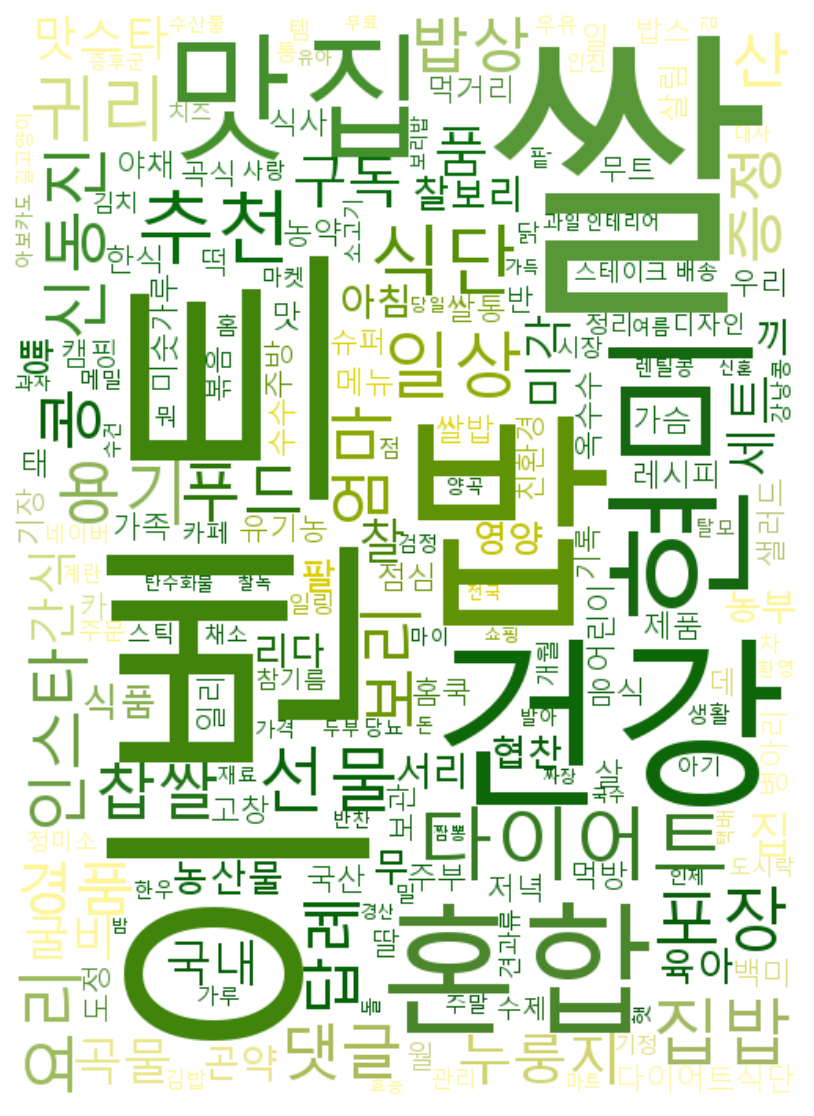

<Figure size 432x288 with 0 Axes>

In [63]:
# ÌäπÏ†ïÏù¥ÎØ∏ÏßÄ1 Ïù¥Ïö© ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
img = np.array(Image.open('image/ÏûòÏÇ¥ÏïÑÎ≥¥ÏÑ∏.png'))
image_color = wordcloud.ImageColorGenerator(img) #Ïù¥ÎØ∏ÏßÄÏùò color Ïù¥Ïö©
cloud_image = wordcloud.WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                                    background_color="white", mask=img).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(cloud_image.recolor(color_func=image_color),
           interpolation="bilinear")
plt.axis("off") #Ï∂ïÏÑ§Ï†ï off
plt.show()
plt.savefig("Ïù∏Ïä§ÌÉÄ_ÏßëÎ∞•_ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú.png") #Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎ°ú Ï†ÄÏû•